In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr
import hvplot.xarray
import geoviews as gv
import geoviews.feature as gf
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import shapely
import scipy.constants
import pandas as pd
import traceback
import geopandas as gpd
import xopr.opr_access
import xopr.geometry

hvplot.extension('bokeh')

In [3]:
# Useful projections
epsg_3413 = ccrs.Stereographic(
    central_latitude=90,  # Tangent at the North Pole
    central_longitude=0,  # Common central meridian
    true_scale_latitude=60 # Latitude where scale is true (or near pole for polar stereo)
)
latlng = ccrs.PlateCarree()
features = gf.ocean.options(scale='50m').opts(projection=epsg_3413) * gf.coastline.options(scale='50m').opts(projection=epsg_3413)

In [4]:
# Establish an OPR session
# You'll probably want to set a cache directory if you're running this locally to speed
# up subsequent requests. You can do other things like customize the STAC API endpoint,
# but you shouldn't need to do that for most use cases.
opr = xopr.opr_access.OPRConnection(cache_dir="/tmp")

# Or you can open a connection without a cache directory (for example, if you're parallelizing
# this on a cloud cluster without persistent storage).
#opr = xopr.OPRConnection()

In [5]:
petermann_gdf = gpd.read_file('./petermann_merged_basin_clip.gpkg')
petermann_gdf = petermann_gdf.dissolve()
peter_geom = petermann_gdf.iloc[0].geometry

In [6]:
peter_latlon = petermann_gdf.to_crs(latlng.proj4_init)
region = peter_latlon.iloc[0].geometry

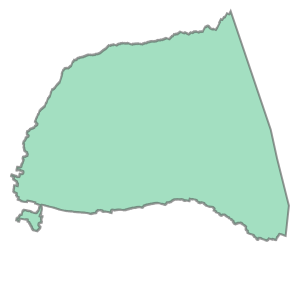

In [7]:
xopr.geometry.project_geojson(region)

In [13]:
# date_range = ( pd.to_datetime('2008-01-01').to_pydatetime(), pd.to_datetime('2025-01-01').to_pydatetime() )
# date_range[0].to_pydatetime()
date_range = '2008-01-01T00:00:00Z/2025-01-01T00:00:00Z'
stac_items = opr.query_frames(geometry=region, date_range=date_range ,max_items=50)

In [14]:
# Plot a map of our loaded data over the selected region on an EPSG:3031 projection

# Create a GeoViews object for the selected region
region_gv = gv.Polygons(region, crs=latlng).opts(
    color='green',
    line_color='black',
    fill_alpha=0.5,
    projection=epsg_3413,
)
# Plot the frame geometries
frame_lines = []
for item in stac_items.geometry:
    frame_lines.append(gv.Path(item, crs=latlng).opts(
        line_width=2,
        projection=epsg_3413
    ))

(features * region_gv * gv.Overlay(frame_lines)).opts(projection=epsg_3413)

:Overlay
   .Ocean.I      :Feature   [Longitude,Latitude]
   .Coastline.I  :Feature   [Longitude,Latitude]
   .Polygons.I   :Polygons   [Longitude,Latitude]
   .Path.I       :Path   [Longitude,Latitude]
   .Path.II      :Path   [Longitude,Latitude]
   .Path.III     :Path   [Longitude,Latitude]
   .Path.IV      :Path   [Longitude,Latitude]
   .Path.V       :Path   [Longitude,Latitude]
   .Path.VI      :Path   [Longitude,Latitude]
   .Path.VII     :Path   [Longitude,Latitude]
   .Path.VIII    :Path   [Longitude,Latitude]
   .Path.IX      :Path   [Longitude,Latitude]
   .Path.X       :Path   [Longitude,Latitude]
   .Path.XI      :Path   [Longitude,Latitude]
   .Path.XII     :Path   [Longitude,Latitude]
   .Path.XIII    :Path   [Longitude,Latitude]
   .Path.XIV     :Path   [Longitude,Latitude]
   .Path.XV      :Path   [Longitude,Latitude]
   .Path.XVI     :Path   [Longitude,Latitude]
   .Path.XVII    :Path   [Longitude,Latitude]
   .Path.XVIII   :Path   [Longitude,Latitude]
   .Path.XIX     :Path   [Longitude,Latitude]
   .Path.XX      :Path   [Longitude,Latitude]
   .Path.XXI     :Path   [Longitude,Latitude]
   .Path.XXII    :Path   [Longitude,Latitude]
   .Path.XXIII   :Path   [Longitude,Latitude]
   .Path.XXIV    :Path   [Longitude,Latitude]
   .Path.XXV     :Path   [Longitude,Latitude]
   .Path.XXVI    :Path   [Longitude,Latitude]
   .Path.XXVII   :Path   [Longitude,Latitude]
   .Path.XXVIII  :Path   [Longitude,Latitude]
   .Path.XXIX    :Path   [Longitude,Latitude]
   .Path.XXX     :Path   [Longitude,Latitude]
   .Path.XXXI    :Path   [Longitude,Latitude]
   .Path.XXXII   :Path   [Longitude,Latitude]
   .Path.XXXIII  :Path   [Longitude,Latitude]
   .Path.XXXIV   :Path   [Longitude,Latitude]
   .Path.XXXV    :Path   [Longitude,Latitude]
   .Path.XXXVI   :Path   [Longitude,Latitude]
   .Path.XXXVII  :Path   [Longitude,Latitude]
   .Path.XXXVIII :Path   [Longitude,Latitude]
   .Path.XXXIX   :Path   [Longitude,Latitude]
   .Path.XL      :Path   [Longitude,Latitude]
   .Path.XLI     :Path   [Longitude,Latitude]
   .Path.XLII    :Path   [Longitude,Latitude]
   .Path.XLIII   :Path   [Longitude,Latitude]
   .Path.XLIV    :Path   [Longitude,Latitude]
   .Path.XLV     :Path   [Longitude,Latitude]
   .Path.XLVI    :Path   [Longitude,Latitude]
   .Path.XLVII   :Path   [Longitude,Latitude]
   .Path.XLVIII  :Path   [Longitude,Latitude]
   .Path.XLIX    :Path   [Longitude,Latitude]
   .Path.L       :Path   [Longitude,Latitude]

In [15]:
stac_items

collection  \
stac_item_id                               
Data_20100324_03_001  2010_Greenland_DC8   
Data_20100324_02_001  2010_Greenland_DC8   
Data_20100324_02_002  2010_Greenland_DC8   
Data_20100420_03_008  2010_Greenland_DC8   
Data_20100420_03_009  2010_Greenland_DC8   
Data_20100420_03_010  2010_Greenland_DC8   
Data_20100420_03_011  2010_Greenland_DC8   
Data_20100420_03_012  2010_Greenland_DC8   
Data_20100324_01_012  2010_Greenland_DC8   
Data_20100324_01_013  2010_Greenland_DC8   
Data_20100324_01_014  2010_Greenland_DC8   
Data_20100324_01_018  2010_Greenland_DC8   
Data_20100324_01_019  2010_Greenland_DC8   
Data_20100324_01_020  2010_Greenland_DC8   
Data_20100324_01_024  2010_Greenland_DC8   
Data_20100324_01_025  2010_Greenland_DC8   
Data_20100324_01_026  2010_Greenland_DC8   
Data_20100324_01_028  2010_Greenland_DC8   
Data_20100324_01_029  2010_Greenland_DC8   
Data_20100324_01_030  2010_Greenland_DC8   
Data_20100324_01_038  2010_Greenland_DC8   
Data_20100324_01_034  2010_Greenland_DC8   
Data_20100324_01_035  2010_Greenland_DC8   
Data_20100324_01_036  2010_Greenland_DC8   
Data_20100324_01_037  2010_Greenland_DC8   
Data_20100324_01_039  2010_Greenland_DC8   
Data_20100324_01_040  2010_Greenland_DC8   
Data_20100324_01_041  2010_Greenland_DC8   
Data_20100324_01_042  2010_Greenland_DC8   
Data_20110329_01_011   2011_Greenland_P3   
Data_20110329_01_012   2011_Greenland_P3   
Data_20110329_01_013   2011_Greenland_P3   
Data_20110329_01_014   2011_Greenland_P3   
Data_20110429_02_014   2011_Greenland_P3   
Data_20110429_02_015   2011_Greenland_P3   
Data_20110429_02_018   2011_Greenland_P3   
Data_20110429_02_019   2011_Greenland_P3   
Data_20110509_01_011   2011_Greenland_P3   
Data_20110509_01_012   2011_Greenland_P3   
Data_20110509_01_013   2011_Greenland_P3   
Data_20110507_02_008   2011_Greenland_P3   
Data_20110507_02_009   2011_Greenland_P3   
Data_20110507_02_010   2011_Greenland_P3   
Data_20110507_02_011   2011_Greenland_P3   
Data_20110507_02_013   2011_Greenland_P3   
Data_20110507_02_014   2011_Greenland_P3   
Data_20110507_02_015   2011_Greenland_P3   
Data_20110507_02_016   2011_Greenland_P3   
Data_20110507_02_017   2011_Greenland_P3   
Data_20120330_01_006   2012_Greenland_P3   

                                                               geometry  \
stac_item_id                                                              
Data_20100324_03_001  LINESTRING (-58.08389 79.80457, -55.86274 80.033)   
Data_20100324_02_001  LINESTRING (-53.76708 80.30466, -56.09652 80.0...   
Data_20100324_02_002  LINESTRING (-56.00761 80.09947, -58.47365 79.8...   
Data_20100420_03_008  LINESTRING (-62.44668 81.33035, -62.40026 81.3...   
Data_20100420_03_009  LINESTRING (-61.27258 80.92154, -60.66166 80.7...   
Data_20100420_03_010  LINESTRING (-59.77646 80.55455, -58.3045 80.29...   
Data_20100420_03_011  LINESTRING (-57.87752 80.23955, -57.71175 80.2...   
Data_20100420_03_012  LINESTRING (-56.49896 80.13699, -56.42151 80.1...   
Data_20100324_01_012  LINESTRING (-53.98665 79.98199, -55.94802 80.5...   
Data_20100324_01_013  LINESTRING (-55.89069 80.50956, -56.05599 80.5...   
Data_20100324_01_014  LINESTRING (-56.37362 80.51315, -56.35694 80.4...   
Data_20100324_01_018  LINESTRING (-54.80001 79.89166, -56.82483 80.4...   
Data_20100324_01_019  LINESTRING (-56.76666 80.42533, -56.87595 80.4...   
Data_20100324_01_020  LINESTRING (-57.32373 80.41828, -57.31094 80.4...   
Data_20100324_01_024  LINESTRING (-55.63294 79.80863, -57.6925 80.35...   
Data_20100324_01_025  LINESTRING (-58.40089 80.37213, -58.50752 80.3...   
Data_20100324_01_026  LINESTRING (-60.60158 80.71497, -60.63614 80.7...   
Data_20100324_01_028  LINESTRING (-62.05964 81.18904, -62.03415 81.1...   
Data_20100324_01_029  LINESTRING (-60.88752 80.76501, -60.62246 80.6...   
Data_20100324_01_030  LINESTRING (-58.79276 80.37701, -58.68287 80.3...   
Data_20100324_01_038  LINESTRING (-54.47677 80.4775, -54.28224 80.49...   
Data_20100324_01

In [16]:
stac_items['assets'].iloc[0]

{'CSARP_standard': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/CSARP_standard/20100324_03/Data_20100324_03_001.mat',
  'type': 'application/x-matlab-data'},
 'data': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/CSARP_standard/20100324_03/Data_20100324_03_001.mat',
  'type': 'application/x-matlab-data'},
 'flight_path': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/images/20100324_03/20100324_03_001_0maps.jpg',
  'type': 'image/jpeg'},
 'thumbnails': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/images/20100324_03/20100324_03_001_2echo_picks.jpg',
  'type': 'image/jpeg'},
 'CSARP_layer': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/CSARP_layer/20100324_03/Data_20100324_03_001.mat',
  'type': 'application/x-matlab-data'},
 'CSARP_mvdr': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/CSARP_mvdr/20100324_03/Data_20100324_03_001.mat',
  'type': 'application/x-matlab-data'}}

In [17]:
def extract_layer_peak_power(radar_ds, layer_twtt, margin_twtt):
    """
    Extract the peak power of a radar layer within a specified margin around the layer's two-way travel time (TWTT).

    Parameters:
    - radar_ds: xarray Dataset containing radar data.
    - layer_twtt: The two-way travel time of the layer to extract.
    - margin_twtt: The margin around the layer's TWTT to consider for peak power extraction.

    Returns:
    - A DataArray containing the peak power values for the specified layer.
    """
    
    # Ensure that layer_twtt.slow_time matches the radar_ds slow_time
    t_start = np.minimum(radar_ds.slow_time.min(), layer_twtt.slow_time.min())
    t_end = np.maximum(radar_ds.slow_time.max(), layer_twtt.slow_time.max())
    layer_twtt = layer_twtt.sel(slow_time=slice(t_start, t_end))
    radar_ds = radar_ds.sel(slow_time=slice(t_start, t_end))
    #layer_twtt = layer_twtt.interp(slow_time=radar_ds.slow_time, method='nearest')
    layer_twtt = layer_twtt.reindex(slow_time=radar_ds.slow_time, method='nearest', tolerance=pd.Timedelta(seconds=1), fill_value=np.nan)
    
    # Calculate the start and end TWTT for the margin
    start_twtt = layer_twtt - margin_twtt
    end_twtt = layer_twtt + margin_twtt
    
    # Extract the data within the specified TWTT range
    data_within_margin = radar_ds.where((radar_ds.twtt >= start_twtt) & (radar_ds.twtt <= end_twtt), drop=True)

    power_dB = 10 * np.log10(np.abs(data_within_margin.Data))

    # Find the twtt index corresponding to the peak power
    peak_twtt_index = power_dB.argmax(dim='twtt')
    # Convert the index to the actual TWTT value
    peak_twtt = power_dB.twtt[peak_twtt_index]

    # Calculate the peak power in dB
    peak_power = power_dB.isel(twtt=peak_twtt_index)

    # Remove unnecessary dimensions
    peak_twtt = peak_twtt.drop_vars('twtt')
    peak_power = peak_power.drop_vars('twtt')
    
    return peak_twtt, peak_power

def surface_bed_reflection_power(stac_item, opr=xopr.opr_access.OPRConnection()):

    frame = opr.load_frame(stac_item, data_product='CSARP_standard')
    frame = frame.resample(slow_time='5s').mean()

    layers = opr.get_layers(frame, source='auto', include_geometry=False)
    if layers is None:
        return None
    
    # Re-pick surface and bed layers to ensure we're getting the peaks
    speed_of_light_in_ice = scipy.constants.c / np.sqrt(3.17)  # Speed of light in ice (m/s)
    layer_selection_margin_twtt = 50 / speed_of_light_in_ice # approx 50 m margin in ice
    surface_repicked_twtt, surface_power = extract_layer_peak_power(frame, layers["standard:surface"]['twtt'], layer_selection_margin_twtt)
    bed_repicked_twtt, bed_power = extract_layer_peak_power(frame, layers["standard:bottom"]['twtt'], layer_selection_margin_twtt)

    # Create a dataset from surface_repicked_twtt, bed_repicked_twtt, surface_power, and bed_power

    reflectivity_dataset = xr.merge([
        surface_repicked_twtt.rename('surface_twtt'),
        bed_repicked_twtt.rename('bed_twtt'),
        surface_power.rename('surface_power_dB'),
        bed_power.rename('bed_power_dB'),
        ],
        compat='override')

    flight_line_metadata = frame.drop_vars(['Data', 'Surface'])
    reflectivity_dataset = xr.merge([reflectivity_dataset, flight_line_metadata])

    reflectivity_dataset = reflectivity_dataset.drop_dims(['twtt'])  # Remove the twtt dimension since everything has been flattened

    attributes_to_copy = ['season', 'segment', 'doi', 'ror', 'funder_text']
    reflectivity_dataset.attrs = {attr: frame.attrs[attr] for attr in attributes_to_copy if attr in frame.attrs}

    return reflectivity_dataset

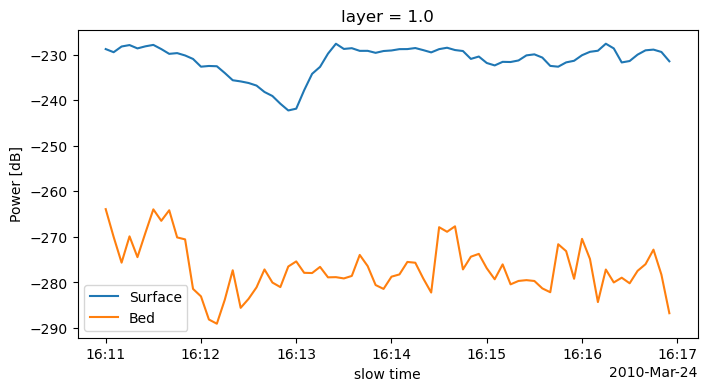

In [43]:
reflectivity = surface_bed_reflection_power(stac_items.iloc[0], opr=opr)

fig, ax = plt.subplots(figsize=(8, 4))
reflectivity['surface_power_dB'].plot(ax=ax, x='slow_time', label='Surface')
reflectivity['bed_power_dB'].plot(ax=ax, x='slow_time', label='Bed')
ax.set_ylabel('Power [dB]')
ax.legend()
plt.show()

In [19]:
import dask
from dask.distributed import LocalCluster

client = LocalCluster().get_client()

In [20]:
stac_list = [row for _, row in stac_items.iterrows()]
futures = client.map(surface_bed_reflection_power, stac_list, opr=opr)

# Process results as they complete, capturing exceptions
results = []
for future in dask.distributed.as_completed(futures):
    try:
        result = future.result()
        results.append(result)
    except Exception as e:
        print(traceback.format_exc())

In [21]:
# Create a GeoViews object for the selected region
region_gv = gv.Polygons(region, crs=latlng).opts(
    line_color='black',
    fill_alpha=0,
    projection=epsg_3413,
)

data_lines = []
for ds in results:
    if ds is None:
        continue
    ds['bed_minus_surf'] = ds['bed_power_dB'] - ds['surface_power_dB']
    ds = ds.dropna(dim='slow_time')
    ds = xopr.geometry.project_dataset(ds, target_crs=epsg_3413.to_string())
    sc = ds.hvplot.scatter(x='x', y='y', c='bed_minus_surf',
                           hover_cols=['surface_power_dB', 'bed_power_dB'],
                           cmap='turbo', size=3)
    data_lines.append(sc)

(features * region_gv * gv.Overlay(data_lines)).opts(aspect='equal')

:Overlay
   .Ocean.I         :Feature   [Longitude,Latitude]
   .Coastline.I     :Feature   [Longitude,Latitude]
   .Polygons.I      :Polygons   [Longitude,Latitude]
   .Scatter.I       :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.II      :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.III     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.IV      :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.V       :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.VI      :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.VII     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.VIII    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.IX      :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.X       :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XI      :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XII     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XIII    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XIV     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XV      :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XVI     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XVII    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XVIII   :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XIX     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XX      :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXI     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXII    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXIII   :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXIV    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXV     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXVI    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXVII   :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXVIII  :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXIX    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXX     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXXI    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXXII   :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXXIII  :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXXIV   :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXXV    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXXVI   :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXXVII  :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXXVIII :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XXXIX   :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XL      :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XLI     :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XLII    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XLIII   :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XLIV    :Scatter   [x]   (y,bed_minus_surf,surface_power_dB,bed_power_dB)
   .Scatter.XLV     :Scatter   [x]   (y,bed_minus_

In [22]:
results[3]

<xarray.Dataset> Size: 6kB
Dimensions:           (slow_time: 74)
Coordinates:
  * slow_time         (slow_time) datetime64[ns] 592B 2010-03-24T14:03:50 ......
    layer             float64 8B 1.0
Data variables:
    surface_twtt      (slow_time) float64 592B nan nan nan ... 2.951e-06 nan nan
    bed_twtt          (slow_time) float64 592B nan nan nan ... 4.426e-06 nan nan
    surface_power_dB  (slow_time) float64 592B nan nan nan ... -237.1 nan nan
    bed_power_dB      (slow_time) float64 592B nan nan nan ... -218.4 nan nan
    GPS_time          (slow_time) float64 592B 1.269e+09 1.269e+09 ... 1.269e+09
    Latitude          (slow_time) float64 592B 81.19 81.18 81.18 ... 80.75 80.75
    Longitude         (slow_time) float64 592B -62.06 -62.05 ... -60.85 -60.83
    Elevation         (slow_time) float64 592B 481.2 481.9 482.9 ... 472.5 473.3
    bed_minus_surf    (slow_time) float64 592B nan nan nan 0.0 ... 18.64 nan nan
Attributes:
    segment:  1

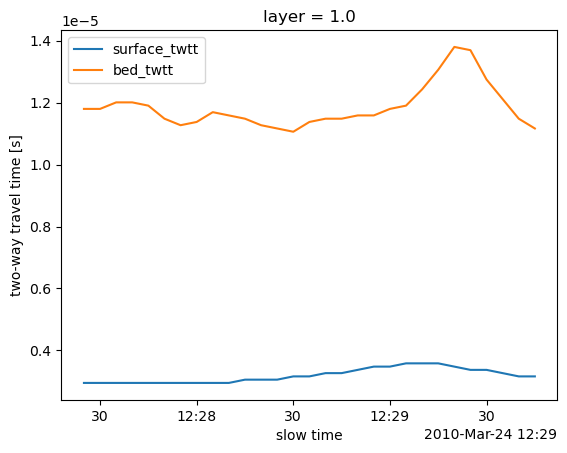

In [23]:
fig2, ax2 = plt.subplots()
results[1]['surface_twtt'].plot(ax=ax2, label='surface_twtt')
results[1]['bed_twtt'].plot(ax=ax2, label='bed_twtt')
# ax.set_ylabel('Power [dB]')
ax2.legend()
plt.show()

In [ ]:
#frames from manually looking on OPS
ops_frames = ['20100420_02_007', '20100420_03_009']

In [34]:
mask = stac_items.index == 'Data_20100420_03_009'
Data_20100420_03_009 = stac_items[mask]

Empty GeoDataFrame
Columns: [collection, geometry, properties, assets, bbox, id, links, stac_extensions, stac_version, type]
Index: []

In [41]:
Data_20100420_03_009['assets']['Data_20100420_03_009']

{'CSARP_standard': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/CSARP_standard/20100420_03/Data_20100420_03_009.mat',
  'type': 'application/x-matlab-data'},
 'data': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/CSARP_standard/20100420_03/Data_20100420_03_009.mat',
  'type': 'application/x-matlab-data'},
 'flight_path': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/images/20100420_03/20100420_03_009_0maps.jpg',
  'type': 'image/jpeg'},
 'thumbnails': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/images/20100420_03/20100420_03_009_2echo_picks.jpg',
  'type': 'image/jpeg'},
 'CSARP_layer': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/CSARP_layer/20100420_03/Data_20100420_03_009.mat',
  'type': 'application/x-matlab-data'},
 'CSARP_mvdr': {'href': 'https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/CSARP_mvdr/20100420_03/Data_20100420_03_009.mat',
  'type': 'application/x-matlab-data'}}

In [47]:
reflectivity_20100420_03_009 = surface_bed_reflection_power(stac_items.loc['Data_20100420_03_009'], opr=opr)

In [48]:
reflectivity_20100420_03_009

<xarray.Dataset> Size: 5kB
Dimensions:           (slow_time: 71)
Coordinates:
  * slow_time         (slow_time) datetime64[ns] 568B 2010-04-20T18:14:05 ......
    layer             float64 8B 1.0
Data variables:
    surface_twtt      (slow_time) float64 568B nan nan nan ... 2.74e-06 2.74e-06
    bed_twtt          (slow_time) float64 568B nan nan ... 9.586e-06 9.586e-06
    surface_power_dB  (slow_time) float64 568B nan nan nan ... -234.7 -234.8
    bed_power_dB      (slow_time) float64 568B nan nan nan ... -239.5 -243.5
    GPS_time          (slow_time) float64 568B 1.272e+09 1.272e+09 ... 1.272e+09
    Latitude          (slow_time) float64 568B 80.92 80.92 80.91 ... 80.55 80.54
    Longitude         (slow_time) float64 568B -61.27 -61.26 ... -59.72 -59.71
    Elevation         (slow_time) float64 568B 484.3 484.0 483.1 ... 527.0 527.5
Attributes:
    segment:  3

In [50]:
def get_basal_layer_wgs84(stac_item, preloaded_layer=None, opr=xopr.opr_access.OPRConnection()):
    if (preloaded_layer is None) or len(preloaded_layer) < 2:
        layers = opr.get_layers_files(stac_item)
    else:
        layers = preloaded_layer
    
    basal_layer = layers["standard:bottom"]
    surface_layer = layers["standard:surface"]

    surface_wgs84 = layers["standard:surface"]['elev'] - (layers["standard:surface"]['twtt'] * (scipy.constants.c / 2))
    delta_twtt = basal_layer['twtt'] - surface_layer['twtt']
    basal_wgs84 = surface_wgs84 - (delta_twtt * ((scipy.constants.c / np.sqrt(3.15)) / 2))

    basal_layer['wgs84'] = basal_wgs84
    return basal_layer

In [ ]:
bed = get_basal_layer_wgs84(stac_items.loc['Data_20100420_03_009'], preloaded_layer=layer_1).rename({'lat': 'Latitude', 'lon': 'Longitude'})

## Get the Bed at Petermann

In [52]:
import dask
import dask.delayed as delayed
from dask import compute
from dask.distributed import LocalCluster

client = LocalCluster().get_client()
client

/home/m484s199/miniconda3/envs/py312/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41885 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:35673' processes=7 threads=28, memory=31.03 GiB>

In [53]:
@delayed
def safe_get_layers_db(stac_item, opr=xopr.opr_access.OPRConnection()):
    try:
        retries = 1
        backoff_time = 5
        backoff_jitter = 30
        while retries > 0:
            try:
                return opr.get_layers_db(stac_item)
            except requests.exceptions.RequestException as e:
                sleep_time = backoff_time + np.random.uniform(0, backoff_jitter)
                print(f"Request error fetching layers for {stac_item['id']}: {e}. Retrying in {sleep_time:.1f} seconds...")
                time.sleep(sleep_time)
                retries -= 1
                backoff_time *= 2  # Exponential backoff
    except Exception as e:
        print(f"Error fetching layers for {stac_item['id']}: {e}")
        return None

def get_basal_layer_wgs84(stac_item, preloaded_layer=None, opr=xopr.opr_access.OPRConnection()):
    if (preloaded_layer is None) or len(preloaded_layer) < 2:
        layers = opr.get_layers_files(stac_item)
    else:
        layers = preloaded_layer
    
    basal_layer = layers["standard:bottom"]
    surface_layer = layers["standard:surface"]

    surface_wgs84 = layers["standard:surface"]['elev'] - (layers["standard:surface"]['twtt'] * (scipy.constants.c / 2))
    delta_twtt = basal_layer['twtt'] - surface_layer['twtt']
    basal_wgs84 = surface_wgs84 - (delta_twtt * ((scipy.constants.c / np.sqrt(3.15)) / 2))

    basal_layer['wgs84'] = basal_wgs84
    return basal_layer

In [54]:
@delayed
def compute_crossover_error_impl(stac_item_1, stac_item_2, intersection_geometry, layer_1, layer_2):
    """Implementation that receives actual layer values"""
    try:
        bed_1 = get_basal_layer_wgs84(stac_item_1, preloaded_layer=layer_1).rename({'lat': 'Latitude', 'lon': 'Longitude'})
        bed_2 = get_basal_layer_wgs84(stac_item_2, preloaded_layer=layer_2).rename({'lat': 'Latitude', 'lon': 'Longitude'})

        bed_1 = xopr.geometry.project_dataset(bed_1, "EPSG:3031")
        bed_2 = xopr.geometry.project_dataset(bed_2, "EPSG:3031")

        x, y = intersection_geometry.coords[0]

        dist_1 = np.sqrt((bed_1['x'] - x)**2 + (bed_1['y'] - y)**2)
        dist_2 = np.sqrt((bed_2['x'] - x)**2 + (bed_2['y'] - y)**2)

        min_idx_1 = dist_1.argmin().item()
        min_idx_2 = dist_2.argmin().item()

        dist_between_pts = np.sqrt((bed_1['x'][min_idx_1] - bed_2['x'][min_idx_2])**2 + (bed_1['y'][min_idx_1] - bed_2['y'][min_idx_2])**2)

        elev_1 = bed_1['wgs84'][min_idx_1].item()
        elev_2 = bed_2['wgs84'][min_idx_2].item()

        return elev_1, elev_2, dist_between_pts
    except Exception as e:
        print(f"Error in compute_crossover_error: {e}")
        return None, None, None  # Return sentinel values on error

def compute_crossover_error(stac_item_1, stac_item_2, intersection_geometry, preloaded_layer_1=None, preloaded_layer_2=None):
    """Wrapper that handles delayed objects properly"""
    # These will be delayed objects or None
    return compute_crossover_error_impl(stac_item_1, stac_item_2, intersection_geometry, preloaded_layer_1, preloaded_layer_2)

In [ ]:
future_db_layers = {}
future_results = {}
for idx, row in intersections.iterrows():
    stac_item_1 = stac_items_df.loc[row['id_1']].to_dict()
    stac_item_2 = stac_items_df.loc[row['id_2']].to_dict()
    stac_item_1['id'] = row['id_1']
    stac_item_2['id'] = row['id_2']

    # Fetch the layers from the database if available
    # Updated to use opr:segment instead of opr:flight (schema change)
    db_key_1 = (row['collection_1'], row['opr:date_1'], row['opr:segment_1'])
    
    if db_key_1 not in future_db_layers:
        future_db_layers[db_key_1] = safe_get_layers_db(stac_item_1)


    # Create delayed task but DON'T compute yet
    r = compute_crossover_error(
        stac_item_1, stac_item_2, row.intersection_geometry,
        preloaded_layer_1=future_db_layers.get(db_key_1),
        preloaded_layer_2=future_db_layers.get(db_key_2)
    )
    future_results[idx] = r  # Store the delayed object, not the computed result

In [58]:
stac_items.loc['Data_20100420_03_009']['properties']

{'datetime': '2010-04-20T18:17:04.516143+00:00',
 'opr:date': '20100420',
 'opr:segment': 3,
 'opr:bandwidth': 9500000.0,
 'opr:frame': 9,
 'opr:frequency': 193900000.0,
 'opr:hemisphere': 'north',
 'opr:provider': 'cresis',
 'sci:citation': 'CReSIS. 2026. MCoRDS Data, Lawrence, Kansas, USA. Digital Media. http://data.cresis.ku.edu/ . We acknowledge the use of data and/or data products from CReSIS generated with support from the University of Kansas, NASA Operation IceBridge grant NNX16AH54G, NSF grants ACI-1443054, OPP-1739003, and IIS-1838230, Lilly Endowment Incorporated, and Indiana METACyt Initiative.'}

In [59]:
layers = opr.get_layers_files(stac_items.loc['Data_20100420_03_009'])

In [62]:
layers['standard:bottom']

<xarray.Dataset> Size: 140kB
Dimensions:       (slow_time: 3335)
Coordinates:
    layer         float64 8B 2.0
  * slow_time     (slow_time) datetime64[ns] 27kB 2010-04-20T18:14:32.6790719...
Data variables:
    file_type     <U5 20B 'layer'
    file_version  <U1 4B '1'
    elev          (slow_time) float64 27kB 478.7 478.6 478.6 ... 522.4 522.4
    id            float64 8B 2.0
    lat           (slow_time) float64 27kB 80.91 80.91 80.91 ... 80.55 80.55
    lon           (slow_time) float64 27kB -61.24 -61.24 ... -59.73 -59.73
    quality       (slow_time) uint8 3kB 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    twtt          (slow_time) float64 27kB 4.201e-06 4.202e-06 ... 9.953e-06
    type          (slow_time) uint8 3kB 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2
Attributes:
    source_url:  https://data.cresis.ku.edu/data/rds/2010_Greenland_DC8/CSARP...